# Plot Published Data Vectors

Plotting the public kids450 data vectors. 

In [15]:
import numpy as np
import sacc
import matplotlib.pyplot as plt

In [16]:
n_src = 4

In [17]:
data_dir = '/global/cscratch1/sd/elp25/TXPipe/data/kids450/outputs/'

In [18]:
kids_published_data = sacc.Sacc.load_fits(data_dir+'twopoint_data_real_published_blinded.sacc')

In [72]:
kids_data = sacc.Sacc.load_fits(data_dir+'twopoint_data_real.sacc')

In [23]:
kids_data_cov = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe/summary_statistics_real_kids.sacc')

## Plot the Redshift Distribution

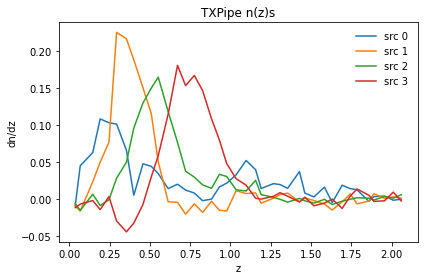

In [20]:
for i in range(n_src):
    tr = kids_data.get_tracer('source_%d' % i)
    plt.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i)

plt.xlabel('z')
plt.ylabel('dn/dz')
plt.legend(loc=1, frameon=False)
plt.title('TXPipe n(z)s')
plt.tight_layout()

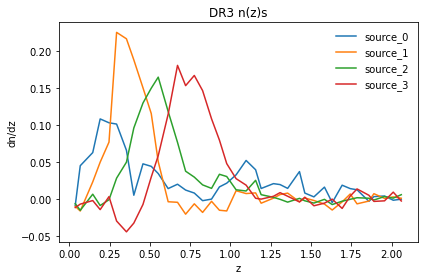

In [21]:
for i in range(n_src):
    tr = kids_published_data.get_tracer('source_%d' % i)
    plt.plot(tr.z, tr.nz/np.sum(tr.nz), label='source_%d' % i)

plt.xlabel('z')
plt.ylabel('dn/dz')
plt.legend(loc=1, frameon=False)
plt.title('DR3 n(z)s')
plt.tight_layout()

## Plot the Covariance Matrix

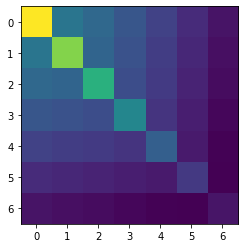

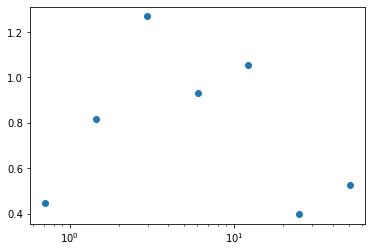

In [22]:
#fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 8))
from matplotlib.colors import LogNorm

i = 0
j = 0

theta, xip, cov = kids_published_data.get_theta_xi(
    'galaxy_shear_xi_plus', 
    'source_%d' % i, 
    'source_%d' % j,
    return_cov=True,
)
plt.imshow(cov,norm=LogNorm())
plt.show()
plt.semilogx(theta, theta * xip * 1e4, 'o')
plt.show()

In [28]:
covmat = kids_data_cov.covariance.covmat

In [79]:
kids_data.cov = kids_data_cov.covariance

In [80]:
kids_data.add_covariance(kids_data_cov.covariance)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

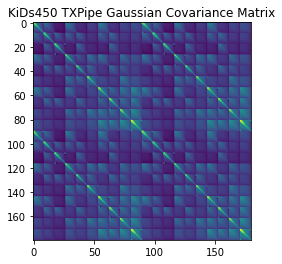

In [81]:
plt.imshow(covmat,norm=LogNorm())
plt.title('KiDs450 TXPipe Gaussian Covariance Matrix')
plt.semilogx(theta, theta * xip * 1e4, 'o')
plt.show()

In [9]:
len(theta)

7

In [10]:
cov.shape

(7, 7)

In [83]:
kids_published_data.to_canonical_order()

## Data Vectors

In [84]:
xip = sacc.standard_types.galaxy_shear_xi_plus
kids_published_data.get_tracer_combinations(xip)
#DD = kv_published_data.get_data_points(xip, ('source_%s' %j,'source_%s' %i))
#theta = np.array([d.get_tag('theta') for d in DD])
#xi    = np.array([d.value for d in DD])

[('source_0', 'source_0'),
 ('source_0', 'source_1'),
 ('source_0', 'source_2'),
 ('source_0', 'source_3'),
 ('source_1', 'source_1'),
 ('source_1', 'source_2'),
 ('source_1', 'source_3'),
 ('source_2', 'source_2'),
 ('source_2', 'source_3'),
 ('source_3', 'source_3')]

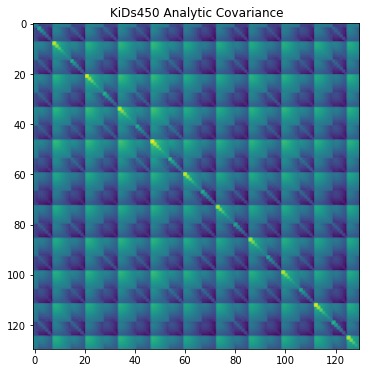

In [92]:
from matplotlib.colors import LogNorm
cov_matrix = kids_published_data.covariance.covmat
plt.figure(figsize=(6,6))
plt.imshow(cov_matrix,norm=LogNorm())
plt.title('KiDs450 Analytic Covariance')
plt.show()

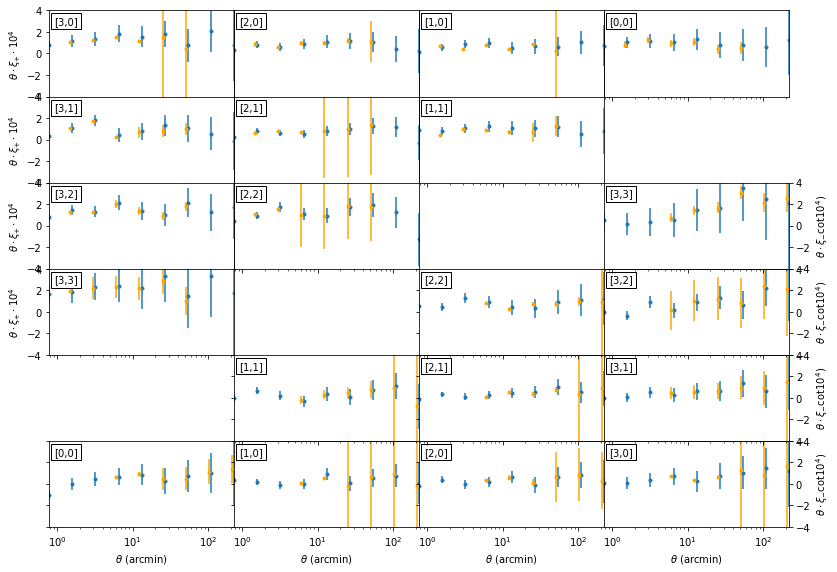

In [97]:
import sacc
#matplotlib.use('agg')
#matplotlib.rcParams["xtick.direction"]='in'
#matplotlib.rcParams["ytick.direction"]='in'


import sacc

xip = sacc.standard_types.galaxy_shear_xi_plus

source_tracers = set()
for b1, b2 in kids_data.get_tracer_combinations(xip):
    source_tracers.add(b1)
    source_tracers.add(b2)

sources = list(sorted(source_tracers))

xip = sacc.standard_types.galaxy_shear_xi_plus
xim = sacc.standard_types.galaxy_shear_xi_minus
nsource = len(sources)

plt.figure(figsize=(nsource*3,(nsource)*2))

theta = kids_data.get_tag('theta', xip)
tmin = np.min(theta)
tmax = np.max(theta)

coord = lambda dt,i,j: (nsource+1-j, i) if dt==xim else (j, nsource-1-i)

for dt in [xip, xim]:
    for i in range(len(sources[:])):
        for j in range(len(sources[:])):
            D = kids_data.get_data_points(dt, ('source_%s' %i,'source_%s' %j))


            if len(D)==0:
                continue

            ax = plt.subplot2grid((nsource+2, nsource), coord(dt,i,j))

            scale = 1e-4

            #theta = np.array([d.get_tag('theta') for d in D])
            #xi    = np.array([d.value for d in D])
            #err   = np.array([d.get_tag('error') for d  in D])
            #w = err>0
            #theta = theta[w]
            #xi = xi[w]
            #err = err[w]
            
            if dt==sacc.standard_types.galaxy_shear_xi_plus:
                theta, xi, cov = kids_data.get_theta_xi(
                'galaxy_shear_xi_plus', 
                'source_' + str(i), 
                'source_' + str(j),
                return_cov=True,
                    )
            else:
                theta, xi, cov = kids_data.get_theta_xi(
                'galaxy_shear_xi_minus', 
                'source_' + str(i), 
                'source_' + str(j),
                return_cov=True,
                    )
            
            plt.errorbar(theta, xi*theta / scale, np.sqrt(np.diagonal(cov))*theta / scale, fmt='.',label='data')
            
            if dt==sacc.standard_types.galaxy_shear_xi_plus:
                theta, xi, cov = kids_published_data.get_theta_xi(
                'galaxy_shear_xi_plus', 
                'source_' + str(j), 
                'source_' + str(i),
                return_cov=True,
                    )
            else:
                theta, xi, cov = kids_published_data.get_theta_xi(
                'galaxy_shear_xi_minus', 
                'source_' + str(j), 
                'source_' + str(i),
                return_cov=True,
                    )
            plt.errorbar(theta, xi*theta / scale, np.sqrt(np.diagonal(cov))*theta / scale, fmt='.',label='published results',color='orange')
            plt.xscale('log')
            plt.ylim(-4,4)
            plt.xlim(tmin, tmax)

            if dt==xim:
                if j>0:
                    ax.set_xticklabels([])
                else:
                    plt.xlabel(r'$\theta$ (arcmin)')

                if i==nsource-1:
                    ax.yaxis.tick_right()
                    ax.yaxis.set_label_position("right")
                    ax.set_ylabel(r'$\theta \cdot \xi_{-} \cot 10^4)$')
                else:
                    ax.set_yticklabels([])
            else:
                ax.set_xticklabels([])
                if i==nsource-1:
                    ax.set_ylabel(r'$\theta \cdot \xi_{+} \cdot 10^4$')
                else:
                    ax.set_yticklabels([])

            props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
            plt.text(0.03, 0.93, f'[{i},{j}]', transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)


plt.show()